In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [5]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [6]:
df['Date'] = pd.to_datetime(df.Date)
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['days'] = df.Date.dt.day

In [7]:
#convert Farehait to Celcius
df['Data_Value'] = (df['Data_Value'] -32) * (5/9)

In [8]:
df.head()

,ID,Date,Element,Data_Value,year,month,days
0,USW00094889,2014-11-12,TMAX,-5.555556,2014,11,12
1,USC00208972,2009-04-29,TMIN,13.333333,2009,4,29
2,USC00200032,2008-05-26,TMAX,136.666667,2008,5,26
3,USC00205563,2005-11-11,TMAX,59.444444,2005,11,11
4,USC00200230,2014-02-27,TMAX,-76.666667,2014,2,27


In [9]:
#delete 29 February
delete_row = df[df['month'].eq(2)&(df['days']==29)].index
df = df.drop(delete_row)

In [10]:
#filter data 2005-2014 vs 2015
df_20052014 = df[df['year']!=2015]
df_2015 = df[df['year']==2015]

In [11]:
#filter data based on high and low temperature in 2005-2014
max_data_20052014 = df_20052014[df_20052014['Element']=="TMAX"]
min_data_20052014 = df_20052014[df_20052014['Element']=="TMIN"]
#get coldest and hottest temperature based on date
df_max_514 = df.groupby([max_data_20052014['Date'].dt.date]).max()
df_min_514 = df.groupby([min_data_20052014['Date'].dt.date]).min()
df_min_514

,ID,Date,Element,Data_Value,year,month,days
Date,,,,,,,
2005-01-01,USC00200032,2005-01-01,TMIN,-48.888889,2005,1,1
2005-01-02,USC00200032,2005-01-02,TMIN,-48.888889,2005,1,2
2005-01-03,USC00200032,2005-01-03,TMIN,-17.777778,2005,1,3
2005-01-04,USC00200032,2005-01-04,TMIN,-39.444444,2005,1,4
2005-01-05,USC00200032,2005-01-05,TMIN,-70.000000,2005,1,5
...,...,...,...,...,...,...,...
2014-12-27,USC00200032,2014-12-27,TMIN,-33.333333,2014,12,27
2014-12-28,USC00200032,2014-12-28,TMIN,-51.111111,2014,12,28
2014-12-29,USC00200032,2014-12-29,TMIN,-78.888889,2014,12,29


In [12]:
data = []
c = list(range(1,366))
for i in range(3651):
    if(i%365==1):
        data = data + c

In [13]:
#add data 2005-2014 daily (365x10 years)
df_max_514['daysOfyear']= data
df_min_514['daysOfyear']= data
#get coldest and hottest day from 2005 to 2014
df_max_514_fix = df_max_514.groupby([df_max_514['daysOfyear']],as_index=False).max()
df_min_514_fix = df_min_514.groupby([df_min_514['daysOfyear']],as_index=False).min()
df_min_514_fix

,ID,Date,Element,Data_Value,year,month,days,daysOfyear
0,USC00200032,2005-01-01,TMIN,-106.666667,2005,1,1,1
1,USC00200032,2005-01-02,TMIN,-166.111111,2005,1,2,2
2,USC00200032,2005-01-03,TMIN,-166.111111,2005,1,3,3
3,USC00200032,2005-01-04,TMIN,-162.777778,2005,1,4,4
4,USC00200032,2005-01-05,TMIN,-101.111111,2005,1,5,5
...,...,...,...,...,...,...,...,...
360,USC00200032,2005-12-27,TMIN,-94.444444,2005,12,27,361
361,USC00200032,2005-12-28,TMIN,-110.000000,2005,12,28,362
362,USC00200032,2005-12-29,TMIN,-101.111111,2005,12,29,363
363,USC00200032,2005-12-30,TMIN,-97.777778,2005,12,30,364


In [14]:
##filter data based on high and low temperature in 2015
max_data_2015 = df_2015[df_2015['Element']=="TMAX"]
min_data_2015 = df_2015[df_2015['Element']=="TMIN"]
min_data_2015

,ID,Date,Element,Data_Value,year,month,days
19,USC00205563,2015-01-03,TMIN,-39.444444,2015,1,3
34,USC00200032,2015-06-06,TMIN,53.333333,2015,6,6
46,USW00014833,2015-08-30,TMIN,81.111111,2015,8,30
50,USC00202308,2015-08-30,TMIN,68.888889,2015,8,30
72,USC00200230,2015-04-01,TMIN,-27.222222,2015,4,1
...,...,...,...,...,...,...,...
165032,USC00205451,2015-10-02,TMIN,22.222222,2015,10,2
165038,USC00207312,2015-07-10,TMIN,56.111111,2015,7,10
165054,USC00208080,2015-02-14,TMIN,-135.000000,2015,2,14
165059,USC00207312,2015-06-23,TMIN,77.777778,2015,6,23


In [16]:
#get coldest and hottest day of the year 2015
df_max_15 = max_data_2015.groupby([max_data_2015['Date'].dt.date],as_index=False).max()
df_min_15 = min_data_2015.groupby([min_data_2015['Date'].dt.date],as_index=False).min()
df_min_15

,ID,Date,Element,Data_Value,year,month,days
0,USC00200032,2015-01-01,TMIN,-91.666667,2015,1,1
1,USC00200032,2015-01-02,TMIN,-85.555556,2015,1,2
2,USC00200032,2015-01-03,TMIN,-55.000000,2015,1,3
3,USC00200032,2015-01-04,TMIN,-66.666667,2015,1,4
4,USC00200032,2015-01-05,TMIN,-103.888889,2015,1,5
...,...,...,...,...,...,...,...
360,USC00200032,2015-12-27,TMIN,-21.111111,2015,12,27
361,USC00200032,2015-12-28,TMIN,-39.444444,2015,12,28
362,USC00200032,2015-12-29,TMIN,-39.444444,2015,12,29
363,USC00200032,2015-12-30,TMIN,-30.000000,2015,12,30


In [17]:
df_max_15['daysOfyear']= c
df_min_15['daysOfyear']= c

In [18]:
df_max_15

,ID,Date,Element,Data_Value,year,month,days,daysOfyear
0,USW00094889,2015-01-01,TMAX,-11.666667,2015,1,1,1
1,USW00094889,2015-01-02,TMAX,3.888889,2015,1,2,2
2,USW00014853,2015-01-03,TMAX,3.888889,2015,1,3,3
3,USW00094889,2015-01-04,TMAX,6.666667,2015,1,4,4
4,USW00094889,2015-01-05,TMAX,-2.222222,2015,1,5,5
...,...,...,...,...,...,...,...,...
360,USW00094889,2015-12-27,TMAX,28.333333,2015,12,27,361
361,USW00094889,2015-12-28,TMAX,16.111111,2015,12,28,362
362,USW00094889,2015-12-29,TMAX,37.777778,2015,12,29,363
363,USW00094889,2015-12-30,TMAX,19.444444,2015,12,30,364


In [19]:
#get hottest day from 2005 to 2015
df_max15 = pd.concat([df_max_15[['daysOfyear','Data_Value']].reset_index(drop=True),df_max_514_fix[['daysOfyear','Data_Value']].reset_index(drop=True)], axis=1)
df_max15.columns = ['daysOfyear_15','Data_Value15','daysOfyear_514', 'Data_Value514']
df_max15['cek'] = np.where(df_max15['Data_Value15'] >= df_max15['Data_Value514'], 'True', 'False')
slices = df_max15[df_max15['cek']=='True']

In [20]:
#get coldest day from 2005 to 2015
df_min15 = pd.concat([df_min_15[['daysOfyear','Data_Value']].reset_index(drop=True),df_min_514_fix[['daysOfyear','Data_Value']].reset_index(drop=True)], axis=1)
df_min15.columns = ['daysOfyear_15','Data_Value15','daysOfyear_514', 'Data_Value514']
df_min15['cek'] = np.where(df_min15['Data_Value15'] <= df_min15['Data_Value514'], 'True', 'False')
slices_min = df_min15[df_min15['cek']=='True']

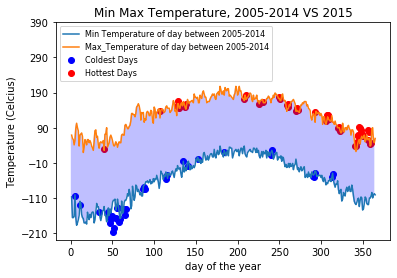

In [21]:
plt.figure()
rng = np.arange(-210,400,100)
#w_dates = np.arange('2005-01-01', '2014-12-31', dtype='datetime64[D]')
plt.scatter(slices_min['daysOfyear_15'], slices_min['Data_Value15'],c='blue')
plt.scatter(slices['daysOfyear_15'], slices['Data_Value15'],c='red')
plt.plot(c, df_min_514_fix['Data_Value'],
         c, df_max_514_fix['Data_Value'])
#plt.xticks(pos, name_month)
plt.gca().fill_between(range(len(c)), df_max_514_fix['Data_Value'], 
                       df_min_514_fix['Data_Value'], facecolor='blue', alpha =0.25)
plt.xlabel('day of the year')
plt.ylabel('Temperature (Celcius)')
plt.title('Min Max Temperature, 2005-2014 VS 2015')
plt.yticks(rng)
plt.legend(['Min Temperature of day between 2005-2014','Max_Temperature of day between 2005-2014', 
            'Coldest Days', 'Hottest Days'],loc='upper left',prop={'size': 8})